In [1]:
import os
import random
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, Dataset, random_split

from tqdm import tqdm

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)
print("Num GPUs Available:", torch.cuda.device_count())

Device: cuda
Num GPUs Available: 2


# **DATA VISULATION **

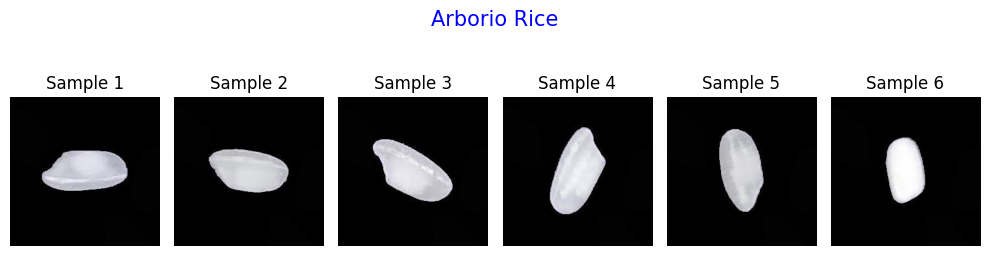

In [3]:
num_samples = 6 # we radomly choose 'number_sampels' samples to visualize them 

arborio_folder = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Arborio' 
arborio = os.listdir(arborio_folder)
random_images = random.sample(arborio, num_samples) #choosing random Images
plt.figure(figsize=(10, 3))
plt.suptitle("Arborio Rice", color="Blue", fontsize=15)
for idx, path in enumerate(random_images):
    join_path = os.path.join(arborio_folder, path)
    img = mpimg.imread(join_path)
    plt.subplot(1, num_samples, idx + 1)
    implot = plt.imshow(img)
    plt.axis("off")  # Hide axis
    plt.title(f"Sample {idx + 1}")
plt.tight_layout()
plt.show()

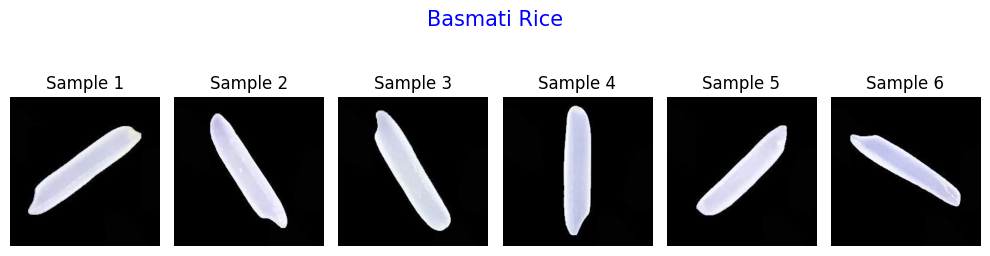

In [4]:

basmati_folder = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Basmati'
basmati = os.listdir(basmati_folder)
random_images = random.sample(basmati, num_samples) 

plt.figure(figsize=(10, 3))
plt.suptitle("Basmati Rice", color="Blue", fontsize=15)

for idx, path in enumerate(random_images):
    join_path = os.path.join(basmati_folder, path)
    img = mpimg.imread(join_path)
    plt.subplot(1, num_samples, idx + 1)
    implot = plt.imshow(img)
    plt.axis("off")
    plt.title(f"Sample {idx + 1}")

plt.tight_layout()
plt.show()

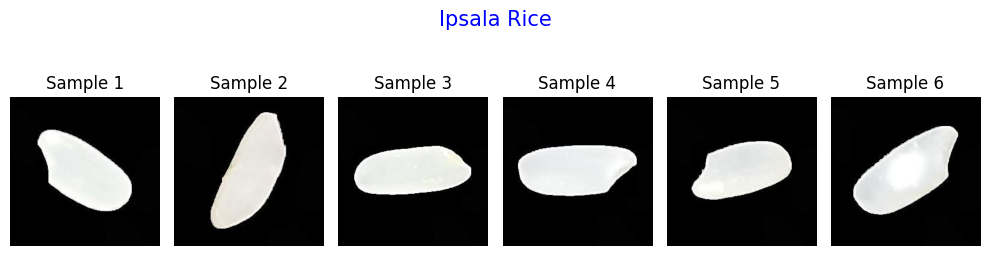

In [5]:
ipsala_folder = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala'
ipsala = os.listdir(ipsala_folder)
random_images = random.sample(ipsala, num_samples) 

plt.figure(figsize=(10, 3))
plt.suptitle("Ipsala Rice", color="Blue", fontsize=15)

for idx, path in enumerate(random_images):
    join_path = os.path.join(ipsala_folder, path)
    img = mpimg.imread(join_path)
    plt.subplot(1, num_samples, idx + 1)
    implot = plt.imshow(img)
    plt.axis("off")
    plt.title(f"Sample {idx + 1}")

plt.tight_layout()
plt.show()

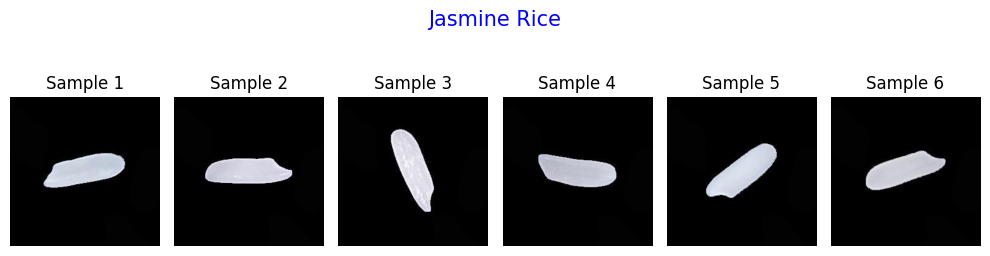

In [6]:
jasmine_folder = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine'
jasmine = os.listdir(jasmine_folder)
random_images = random.sample(jasmine, num_samples)

plt.figure(figsize=(10, 3))
plt.suptitle("Jasmine Rice", color="Blue", fontsize=15)

for idx, path in enumerate(random_images):
    join_path = os.path.join(jasmine_folder, path)
    img = mpimg.imread(join_path)
    plt.subplot(1, num_samples, idx + 1)
    implot = plt.imshow(img)
    plt.axis("off")
    plt.title(f"Sample {idx + 1}")

plt.tight_layout()
plt.show()

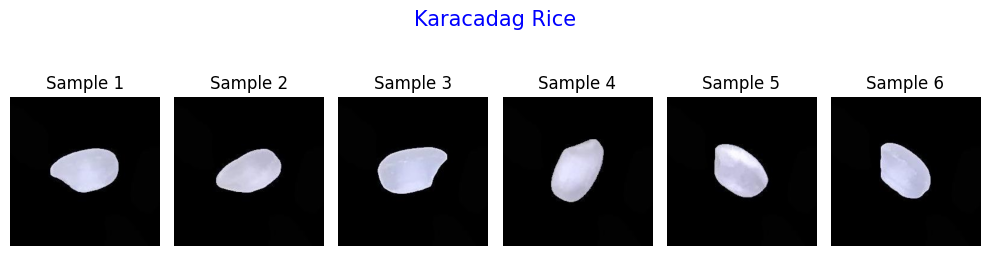

In [7]:
karacadag_folder = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag'
karacadag = os.listdir(karacadag_folder)
random_images = random.sample(karacadag, num_samples)

plt.figure(figsize=(10, 3))
plt.suptitle("Karacadag Rice", color="Blue", fontsize=15)

for idx, path in enumerate(random_images):
    join_path = os.path.join(karacadag_folder, path)
    img = mpimg.imread(join_path)
    plt.subplot(1, num_samples, idx + 1)
    implot = plt.imshow(img)
    plt.axis("off")
    plt.title(f"Sample {idx + 1}")

plt.tight_layout()
plt.show()

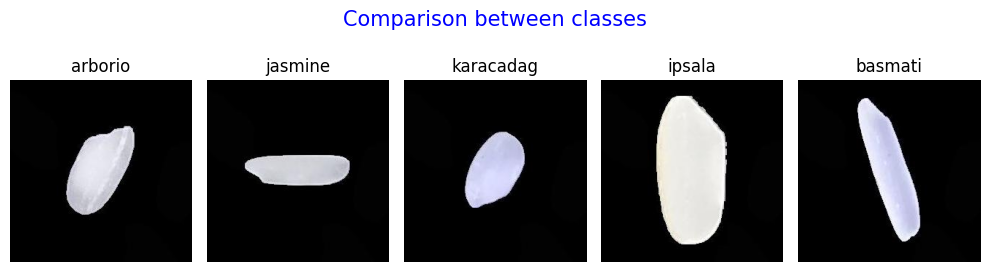

In [8]:
samples = [arborio[0], jasmine[0], karacadag[0], ipsala[0], basmati[0]]
folders = [arborio_folder, jasmine_folder, karacadag_folder, ipsala_folder, basmati_folder]
names = ['arborio', 'jasmine', 'karacadag', 'ipsala', 'basmati']
plt.figure(figsize=(10,3))
plt.suptitle("Comparison between classes",color="Blue",fontsize=15)
for idx,paths in enumerate(samples):
    join_path=os.path.join(folders[idx],paths)
    img=mpimg.imread(join_path)
    plt.subplot(1,5,idx + 1)
    implot=plt.imshow(img)
    plt.axis("off")
    plt.title(names[idx])
plt.tight_layout()
plt.show()

*This code prepares image data for training and validating a classification model — by resizing, normalizing, batching, and splitting images into training and validation sets.*

In [9]:
validation_split = 0.2
image_size = (250,250)
batch_size = 16

transform = transforms.Compose(
    [transforms.Resize(image_size),
     transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)



full_dataset = datasets.ImageFolder(root = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset', transform = transform)
total_size = len(full_dataset)
val_size = int(validation_split * total_size)
train_size = int((1-validation_split)*total_size)
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader (train_dataset, batch_size = batch_size, shuffle = True)

val_loader = DataLoader (val_dataset, batch_size = batch_size, shuffle = True)

#classes = ('arborio', 'basmati', 'ipsala', 'jasmine', 'karacadag')

In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool  = nn.MaxPool2d(2,2)
        self.fc1   = nn.Linear(32*124**2,16)
        self.fc2   = nn.Linear(16,5)
        self.flatten = nn.Flatten()
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.softmax(x, dim = 1)
        return x

cnn = CNN()

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=1e-3, momentum=0.9)

In [12]:
if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs!")
    cnn = nn.DataParallel(cnn)

cnn.to(device)

Using 2 GPUs!


DataParallel(
  (module): CNN(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (fc1): Linear(in_features=492032, out_features=16, bias=True)
    (fc2): Linear(in_features=16, out_features=5, bias=True)
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
)

In [13]:
num_epochs = 10
best_val_accuracy = 0.0
best_model_path = '/kaggle/working/best_model.pth'
history = {
    'train_loss': [],
    'train_accuracy': [],
    'val_loss': [],
    'val_accuracy': []
}

for epoch in range(num_epochs):  # loop over the dataset multiple times
    cnn.train()
    running_loss = 0.0
    correct = 0
    total = 0

    print(f"\nEpoch {epoch + 1}/{num_epochs}")
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc='Training', ncols=100)

    for i, data in progress_bar:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Accuracy tracking
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Update tqdm description every 10 batches
        if (i + 1) % 10 == 0 or (i + 1) == len(train_loader):
            progress_bar.set_postfix({
                'Loss': f"{running_loss / (i + 1):.4f}",
                'Acc': f"{(correct / total):.4f}"
            })

    # Compute average training loss and accuracy for the epoch
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total

    # Validation phase
    cnn.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = cnn(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = correct / total
    
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(cnn.state_dict(), best_model_path)
        print(f"💾 Best model saved at epoch {epoch + 1} with Val Acc: {val_accuracy:.4f}")

    # Save history
    history['train_loss'].append(train_loss)
    history['train_accuracy'].append(train_accuracy)
    history['val_loss'].append(val_loss)
    history['val_accuracy'].append(val_accuracy)

    print(f"✅ Epoch {epoch + 1} Summary: "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")
    if val_accuracy>= 0.94:
        stopping = input('Shall we stop, is this enough?? 1.Yes 2.No')
        if int(stopping) == 1:
            break

print('\n🎉 Finished Training')


Epoch 1/10


Training: 100%|████████████████████████| 3750/3750 [07:39<00:00,  8.16it/s, Loss=1.2543, Acc=0.6715]


💾 Best model saved at epoch 1 with Val Acc: 0.7664
✅ Epoch 1 Summary: Train Loss: 1.2543, Train Acc: 0.6715, Val Loss: 1.1335, Val Acc: 0.7664

Epoch 2/10


Training: 100%|████████████████████████| 3750/3750 [03:12<00:00, 19.50it/s, Loss=1.1264, Acc=0.7749]


💾 Best model saved at epoch 2 with Val Acc: 0.7749
✅ Epoch 2 Summary: Train Loss: 1.1264, Train Acc: 0.7749, Val Loss: 1.1241, Val Acc: 0.7749

Epoch 3/10


Training: 100%|████████████████████████| 3750/3750 [02:59<00:00, 20.94it/s, Loss=1.1178, Acc=0.7827]


💾 Best model saved at epoch 3 with Val Acc: 0.7774
✅ Epoch 3 Summary: Train Loss: 1.1178, Train Acc: 0.7827, Val Loss: 1.1214, Val Acc: 0.7774

Epoch 4/10


Training: 100%|████████████████████████| 3750/3750 [02:59<00:00, 20.90it/s, Loss=1.1122, Acc=0.7874]


💾 Best model saved at epoch 4 with Val Acc: 0.7812
✅ Epoch 4 Summary: Train Loss: 1.1122, Train Acc: 0.7874, Val Loss: 1.1158, Val Acc: 0.7812

Epoch 5/10


Training: 100%|████████████████████████| 3750/3750 [02:59<00:00, 20.87it/s, Loss=1.1059, Acc=0.7905]


💾 Best model saved at epoch 5 with Val Acc: 0.7838
✅ Epoch 5 Summary: Train Loss: 1.1059, Train Acc: 0.7905, Val Loss: 1.1106, Val Acc: 0.7838

Epoch 6/10


Training: 100%|████████████████████████| 3750/3750 [03:00<00:00, 20.79it/s, Loss=1.1023, Acc=0.7923]


💾 Best model saved at epoch 6 with Val Acc: 0.7860
✅ Epoch 6 Summary: Train Loss: 1.1023, Train Acc: 0.7923, Val Loss: 1.1081, Val Acc: 0.7860

Epoch 7/10


Training: 100%|████████████████████████| 3750/3750 [03:00<00:00, 20.73it/s, Loss=1.1005, Acc=0.7937]


💾 Best model saved at epoch 7 with Val Acc: 0.7873
✅ Epoch 7 Summary: Train Loss: 1.1005, Train Acc: 0.7937, Val Loss: 1.1059, Val Acc: 0.7873

Epoch 8/10


Training: 100%|████████████████████████| 3750/3750 [02:59<00:00, 20.90it/s, Loss=1.0997, Acc=0.7945]


✅ Epoch 8 Summary: Train Loss: 1.0997, Train Acc: 0.7945, Val Loss: 1.1058, Val Acc: 0.7871

Epoch 9/10


Training: 100%|████████████████████████| 3750/3750 [03:03<00:00, 20.49it/s, Loss=1.0988, Acc=0.7949]


✅ Epoch 9 Summary: Train Loss: 1.0988, Train Acc: 0.7949, Val Loss: 1.1061, Val Acc: 0.7863

Epoch 10/10


Training: 100%|████████████████████████| 3750/3750 [03:04<00:00, 20.35it/s, Loss=1.0982, Acc=0.7954]


💾 Best model saved at epoch 10 with Val Acc: 0.7879
✅ Epoch 10 Summary: Train Loss: 1.0982, Train Acc: 0.7954, Val Loss: 1.1045, Val Acc: 0.7879

🎉 Finished Training


[0.7422, 0.7444666666666667, 0.7446, 0.7430666666666667, 0.7452, 0.7452666666666666, 0.7438666666666667, 0.7439333333333333, 0.7452, 0.7406666666666667, 0.7451333333333333, 0.7413333333333333, 0.7434, 0.7456, 0.7454666666666667]


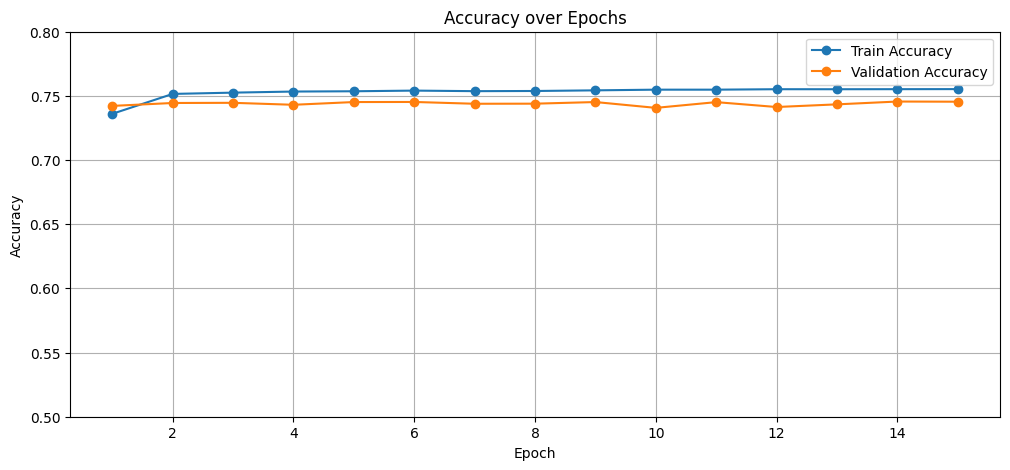

In [24]:
epochs = range(1, len(history['val_accuracy']) + 1)
print(history['val_accuracy'])
# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.plot(epochs, history['train_accuracy'], label='Train Accuracy', marker='o')
plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.5, 0.8)
plt.grid(True)
plt.legend()

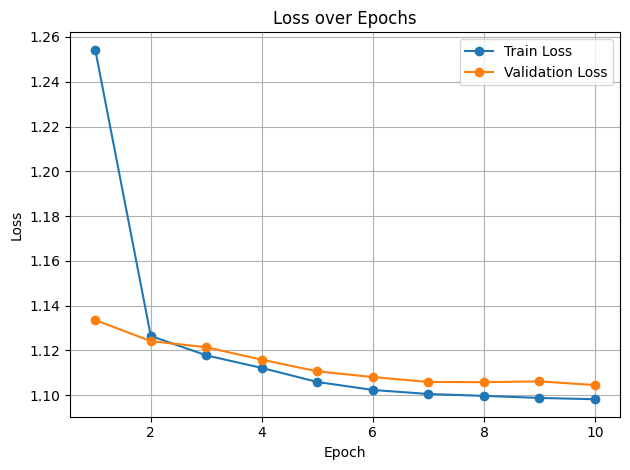

In [15]:
plt.plot(epochs, history['train_loss'], label='Train Loss', marker='o')
plt.plot(epochs, history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
cnn.load_state_dict(torch.load('/kaggle/working/best_model.pth'))
cnn.to(device)
cnn.eval() 

DataParallel(
  (module): CNN(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (fc1): Linear(in_features=492032, out_features=16, bias=True)
    (fc2): Linear(in_features=16, out_features=5, bias=True)
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
)

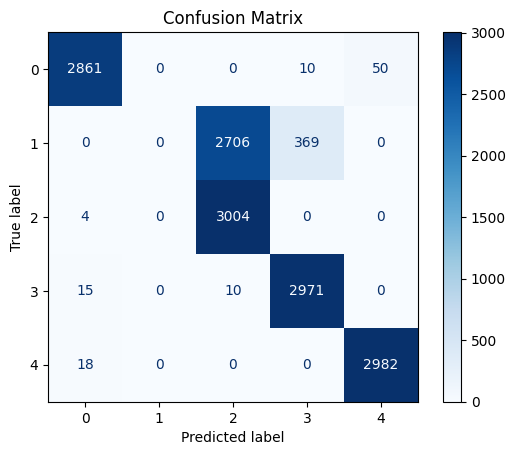

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load best model
cnn.load_state_dict(torch.load(best_model_path))
cnn.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for data in val_loader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = cnn(inputs)
        _, predicted = torch.max(outputs.data, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Predicted: Jasmine, True: Jasmine
True prediction
Predicted: Ipsala, True: Ipsala
True prediction
Predicted: Jasmine, True: Basmati
False prediction
Predicted: Karacadag, True: Karacadag
True prediction
Predicted: Arborio, True: Arborio
True prediction
Predicted: Arborio, True: Arborio
True prediction
Predicted: Ipsala, True: Ipsala
True prediction
Predicted: Arborio, True: Arborio
True prediction
Predicted: Arborio, True: Arborio
True prediction
Predicted: Ipsala, True: Ipsala
True prediction
Predicted: Ipsala, True: Basmati
False prediction
Predicted: Ipsala, True: Ipsala
True prediction
Predicted: Ipsala, True: Basmati
False prediction
Predicted: Jasmine, True: Jasmine
True prediction
Predicted: Arborio, True: Arborio
True prediction
Predicted: Ipsala, True: Basmati
False prediction
Predicted: Jasmine, True: Jasmine
True prediction
Predicted: Jasmine, True: Jasmine
True prediction
Predicted: Ipsala, True: Basmati
False prediction
Predicted: Jasmine, True: Jasmine
True prediction

15

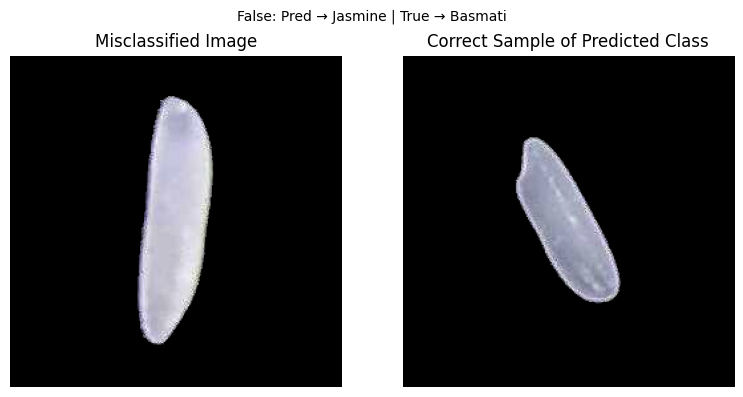

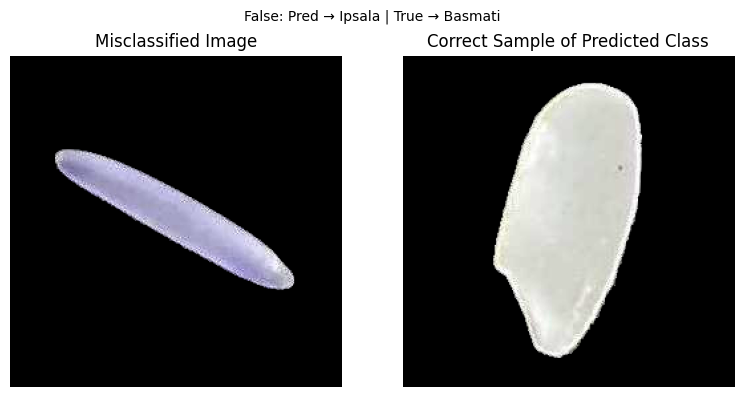

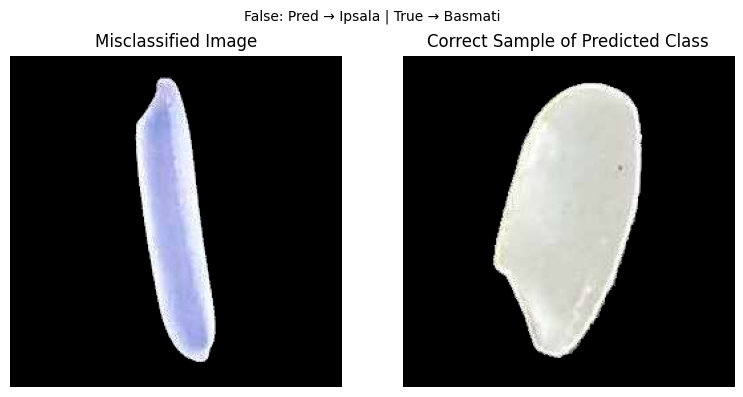

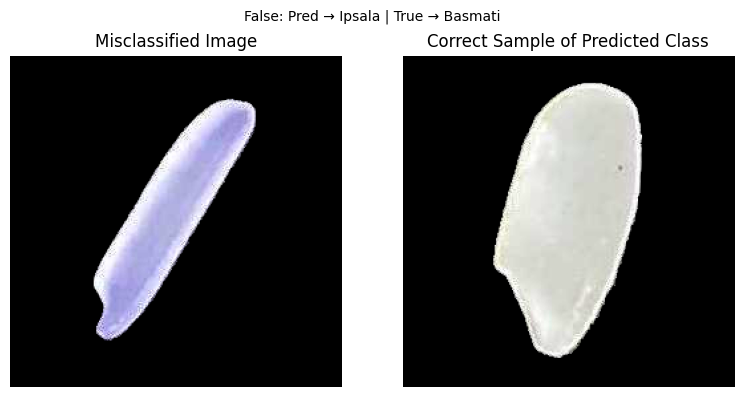

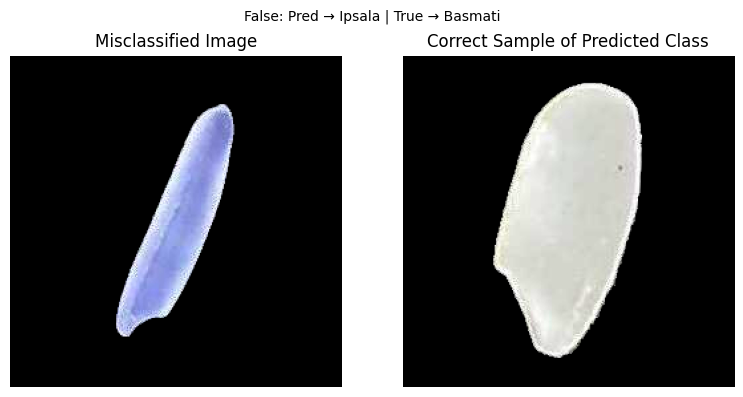

In [18]:
class_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

num_true = 0
num_false = 0
false_images = []
false_titles = []
comparison_images = []

def find_real_sample_of_class(dataset, class_index, exclude_image):
    """
    Find an image in the dataset belonging to class_index that is NOT equal to exclude_image.
    Returns a numpy array image or None if not found.
    """
    for i in range(len(dataset)):
        img, label = dataset[i]
        if label == class_index:
            # Compare images; make sure they are not the same
            if not torch.equal(img, exclude_image):
                # Convert tensor image to numpy for visualization
                return img.cpu().numpy().transpose(1, 2, 0)  # CHW -> HWC
    return None

# Make sure model is in eval mode
cnn.eval()

max_samples = 20
processed_samples = 0

with torch.no_grad():
    for images, labels in val_loader:
        batch_size = images.size(0)

        # Limit batch if it goes over max_samples
        if processed_samples + batch_size > max_samples:
            batch_size = max_samples - processed_samples
            images = images[:batch_size]
            labels = labels[:batch_size]

        images = images.to(next(cnn.parameters()).device)
        labels = labels.to(next(cnn.parameters()).device)

        outputs = cnn(images)
        _, predicted = torch.max(outputs, 1)

        for i in range(batch_size):
            predicted_class = predicted[i].item()
            true_class = labels[i].item()

            print(f"Predicted: {class_names[predicted_class]}, True: {class_names[true_class]}")

            if predicted_class == true_class:
                print("\033[32mTrue prediction\033[0m")
                num_true += 1
            else:
                print("\033[31mFalse prediction\033[0m")
                num_false += 1
                # Store misclassified image (convert CHW to HWC for imshow)
                false_images.append(images[i].cpu().numpy().transpose(1, 2, 0))
                false_titles.append(f"False: Pred → {class_names[predicted_class]} | True → {class_names[true_class]}")
                comparison_images.append(find_real_sample_of_class(val_loader.dataset, predicted_class, images[i].cpu()))

        processed_samples += batch_size
        if processed_samples >= max_samples:
            break

print(f"\n\033[34m{num_true} correct predictions, {num_false} incorrect predictions (out of {processed_samples} samples)\033[0m")

# Plot misclassified images alongside correct sample images
for i in range(len(false_images)):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    axs[0].imshow(false_images[i])
    axs[0].set_title("Misclassified Image")
    axs[0].axis("off")

    if comparison_images[i] is not None:
        axs[1].imshow(comparison_images[i])
        axs[1].set_title("Correct Sample of Predicted Class")
    else:
        axs[1].text(0.5, 0.5, "No sample found", ha='center', va='center')
    axs[1].axis("off")

    plt.suptitle(false_titles[i], fontsize=10)
    plt.tight_layout()
    plt.show()

In [19]:
validation_split = 0.2
image_size = (250,250)
batch_size = 16

transform = transforms.Compose(
    [transforms.Resize(image_size),
     transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)



full_dataset = datasets.ImageFolder(root = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset', transform = transform)
total_size = len(full_dataset)
val_size = int(validation_split * total_size)
train_size = int((1-validation_split)*total_size)
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader (train_dataset, batch_size = batch_size, shuffle = True)

val_loader = DataLoader (val_dataset, batch_size = batch_size, shuffle = True)

#classes = ('arborio', 'basmati', 'ipsala', 'jasmine', 'karacadag')

In [20]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool  = nn.MaxPool2d(2,2)
        self.fc1   = nn.Linear(32*124**2,10)
        self.fc2   = nn.Linear(10,5)
        self.flatten = nn.Flatten()
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.softmax(x, dim = 1)
        return x

cnn = CNN()

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=1e-3, momentum=0.9)

In [22]:
if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs!")
    cnn = nn.DataParallel(cnn)

cnn.to(device)

Using 2 GPUs!


DataParallel(
  (module): CNN(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (fc1): Linear(in_features=492032, out_features=10, bias=True)
    (fc2): Linear(in_features=10, out_features=5, bias=True)
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
)

In [23]:
num_epochs = 15
best_val_accuracy = 0.0
best_model_path = '/kaggle/working/best_model2.pth'
history = {
    'train_loss': [],
    'train_accuracy': [],
    'val_loss': [],
    'val_accuracy': []
}

for epoch in range(num_epochs):  # loop over the dataset multiple times
    cnn.train()
    running_loss = 0.0
    correct = 0
    total = 0

    print(f"\nEpoch {epoch + 1}/{num_epochs}")
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc='Training', ncols=100)

    for i, data in progress_bar:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Accuracy tracking
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Update tqdm description every 10 batches
        if (i + 1) % 10 == 0 or (i + 1) == len(train_loader):
            progress_bar.set_postfix({
                'Loss': f"{running_loss / (i + 1):.4f}",
                'Acc': f"{(correct / total):.4f}"
            })

    # Compute average training loss and accuracy for the epoch
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total

    # Validation phase
    cnn.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = cnn(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = correct / total
    
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(cnn.state_dict(), best_model_path)
        print(f"💾 Best model saved at epoch {epoch + 1} with Val Acc: {val_accuracy:.4f}")

    # Save history
    history['train_loss'].append(train_loss)
    history['train_accuracy'].append(train_accuracy)
    history['val_loss'].append(val_loss)
    history['val_accuracy'].append(val_accuracy)

    print(f"✅ Epoch {epoch + 1} Summary: "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")
    if val_accuracy>= 0.94:
        stopping = input('Shall we stop, is this enough?? 1.Yes 2.No')
        if int(stopping) == 1:
            break

print('\n🎉 Finished Training')


Epoch 1/15


Training: 100%|████████████████████████| 3750/3750 [02:53<00:00, 21.60it/s, Loss=1.1698, Acc=0.7360]


💾 Best model saved at epoch 1 with Val Acc: 0.7422
✅ Epoch 1 Summary: Train Loss: 1.1698, Train Acc: 0.7360, Val Loss: 1.1566, Val Acc: 0.7422

Epoch 2/15


Training: 100%|████████████████████████| 3750/3750 [02:56<00:00, 21.28it/s, Loss=1.1447, Acc=0.7515]


💾 Best model saved at epoch 2 with Val Acc: 0.7445
✅ Epoch 2 Summary: Train Loss: 1.1447, Train Acc: 0.7515, Val Loss: 1.1563, Val Acc: 0.7445

Epoch 3/15


Training: 100%|████████████████████████| 3750/3750 [02:52<00:00, 21.76it/s, Loss=1.1416, Acc=0.7525]


💾 Best model saved at epoch 3 with Val Acc: 0.7446
✅ Epoch 3 Summary: Train Loss: 1.1416, Train Acc: 0.7525, Val Loss: 1.1486, Val Acc: 0.7446

Epoch 4/15


Training: 100%|████████████████████████| 3750/3750 [02:54<00:00, 21.54it/s, Loss=1.1401, Acc=0.7534]


✅ Epoch 4 Summary: Train Loss: 1.1401, Train Acc: 0.7534, Val Loss: 1.1496, Val Acc: 0.7431

Epoch 5/15


Training: 100%|████████████████████████| 3750/3750 [02:54<00:00, 21.50it/s, Loss=1.1392, Acc=0.7536]


💾 Best model saved at epoch 5 with Val Acc: 0.7452
✅ Epoch 5 Summary: Train Loss: 1.1392, Train Acc: 0.7536, Val Loss: 1.1469, Val Acc: 0.7452

Epoch 6/15


Training: 100%|████████████████████████| 3750/3750 [02:56<00:00, 21.23it/s, Loss=1.1385, Acc=0.7541]


💾 Best model saved at epoch 6 with Val Acc: 0.7453
✅ Epoch 6 Summary: Train Loss: 1.1385, Train Acc: 0.7541, Val Loss: 1.1470, Val Acc: 0.7453

Epoch 7/15


Training: 100%|████████████████████████| 3750/3750 [02:57<00:00, 21.18it/s, Loss=1.1386, Acc=0.7537]


✅ Epoch 7 Summary: Train Loss: 1.1386, Train Acc: 0.7537, Val Loss: 1.1487, Val Acc: 0.7439

Epoch 8/15


Training: 100%|████████████████████████| 3750/3750 [02:55<00:00, 21.36it/s, Loss=1.1383, Acc=0.7538]


✅ Epoch 8 Summary: Train Loss: 1.1383, Train Acc: 0.7538, Val Loss: 1.1476, Val Acc: 0.7439

Epoch 9/15


Training: 100%|████████████████████████| 3750/3750 [02:51<00:00, 21.88it/s, Loss=1.1376, Acc=0.7543]


✅ Epoch 9 Summary: Train Loss: 1.1376, Train Acc: 0.7543, Val Loss: 1.1471, Val Acc: 0.7452

Epoch 10/15


Training: 100%|████████████████████████| 3750/3750 [02:51<00:00, 21.87it/s, Loss=1.1373, Acc=0.7549]


✅ Epoch 10 Summary: Train Loss: 1.1373, Train Acc: 0.7549, Val Loss: 1.1536, Val Acc: 0.7407

Epoch 11/15


Training: 100%|████████████████████████| 3750/3750 [02:51<00:00, 21.92it/s, Loss=1.1371, Acc=0.7549]


✅ Epoch 11 Summary: Train Loss: 1.1371, Train Acc: 0.7549, Val Loss: 1.1478, Val Acc: 0.7451

Epoch 12/15


Training: 100%|████████████████████████| 3750/3750 [02:50<00:00, 21.93it/s, Loss=1.1368, Acc=0.7552]


✅ Epoch 12 Summary: Train Loss: 1.1368, Train Acc: 0.7552, Val Loss: 1.1513, Val Acc: 0.7413

Epoch 13/15


Training: 100%|████████████████████████| 3750/3750 [02:51<00:00, 21.82it/s, Loss=1.1364, Acc=0.7552]


✅ Epoch 13 Summary: Train Loss: 1.1364, Train Acc: 0.7552, Val Loss: 1.1474, Val Acc: 0.7434

Epoch 14/15


Training: 100%|████████████████████████| 3750/3750 [02:50<00:00, 21.99it/s, Loss=1.1363, Acc=0.7552]


💾 Best model saved at epoch 14 with Val Acc: 0.7456
✅ Epoch 14 Summary: Train Loss: 1.1363, Train Acc: 0.7552, Val Loss: 1.1452, Val Acc: 0.7456

Epoch 15/15


Training: 100%|████████████████████████| 3750/3750 [02:51<00:00, 21.83it/s, Loss=1.1361, Acc=0.7553]


✅ Epoch 15 Summary: Train Loss: 1.1361, Train Acc: 0.7553, Val Loss: 1.1452, Val Acc: 0.7455

🎉 Finished Training


[0.7422, 0.7444666666666667, 0.7446, 0.7430666666666667, 0.7452, 0.7452666666666666, 0.7438666666666667, 0.7439333333333333, 0.7452, 0.7406666666666667, 0.7451333333333333, 0.7413333333333333, 0.7434, 0.7456, 0.7454666666666667]


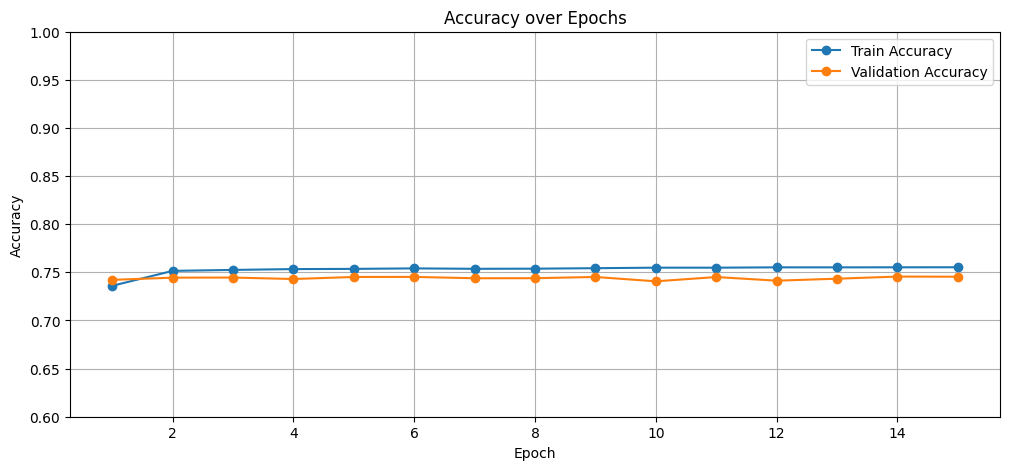

In [25]:
epochs = range(1, len(history['val_accuracy']) + 1)
print(history['val_accuracy'])
# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.plot(epochs, history['train_accuracy'], label='Train Accuracy', marker='o')
plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1)
plt.grid(True)
plt.legend()

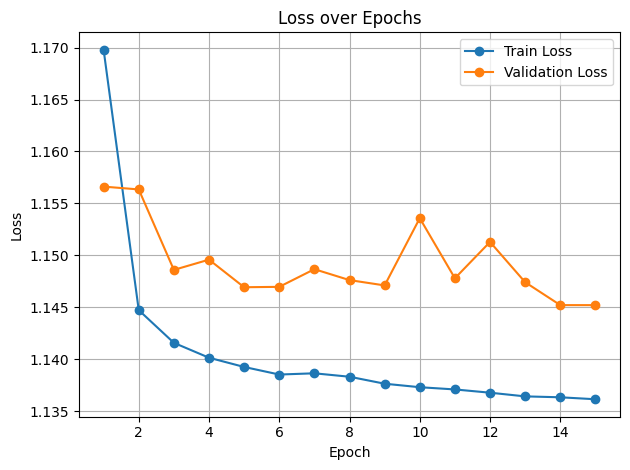

In [26]:
plt.plot(epochs, history['train_loss'], label='Train Loss', marker='o')
plt.plot(epochs, history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
cnn.load_state_dict(torch.load('/kaggle/working/best_model2.pth'))
cnn.to(device)
cnn.eval() 

DataParallel(
  (module): CNN(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (fc1): Linear(in_features=492032, out_features=10, bias=True)
    (fc2): Linear(in_features=10, out_features=5, bias=True)
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
)

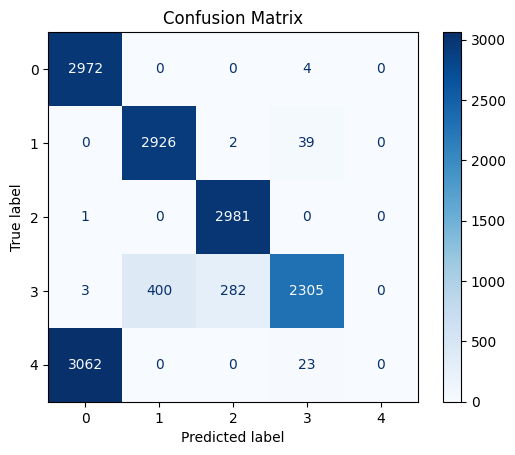

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load best model
cnn.load_state_dict(torch.load(best_model_path))
cnn.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for data in val_loader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = cnn(inputs)
        _, predicted = torch.max(outputs.data, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Predicted: Ipsala, True: Ipsala
True prediction
Predicted: Arborio, True: Karacadag
False prediction
Predicted: Arborio, True: Arborio
True prediction
Predicted: Arborio, True: Karacadag
False prediction
Predicted: Ipsala, True: Ipsala
True prediction
Predicted: Ipsala, True: Ipsala
True prediction
Predicted: Arborio, True: Arborio
True prediction
Predicted: Basmati, True: Basmati
True prediction
Predicted: Ipsala, True: Jasmine
False prediction
Predicted: Basmati, True: Basmati
True prediction
Predicted: Basmati, True: Jasmine
False prediction
Predicted: Arborio, True: Karacadag
False prediction
Predicted: Jasmine, True: Jasmine
True prediction
Predicted: Basmati, True: Basmati
True prediction
Predicted: Jasmine, True: Jasmine
True prediction
Predicted: Basmati, True: Basmati
True prediction
Predicted: Basmati, True: Basmati
True prediction
Predicted: Arborio, True: Karacadag
False prediction
Predicted: Basmati, True: Basmati
True prediction
Predicted: Arborio, True: Arborio
True pred

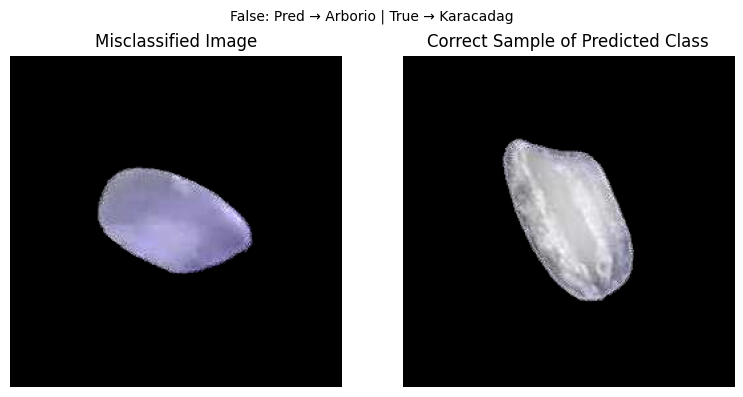

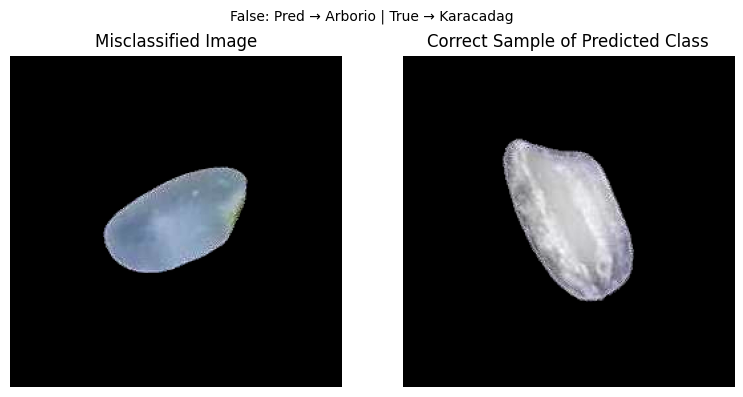

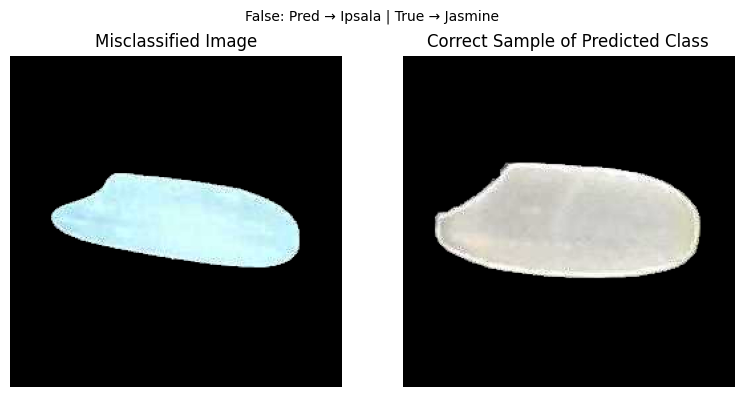

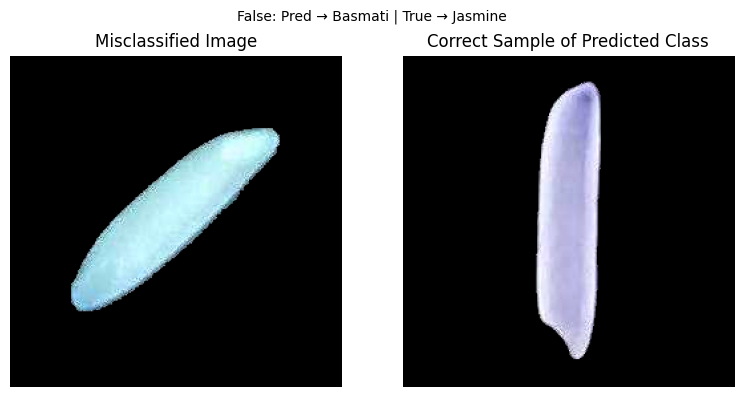

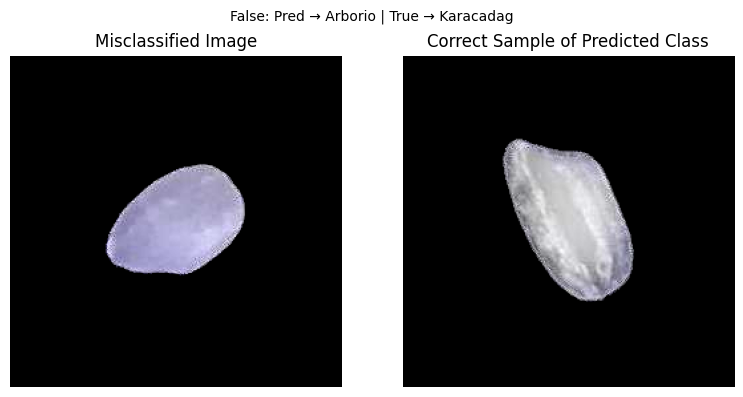

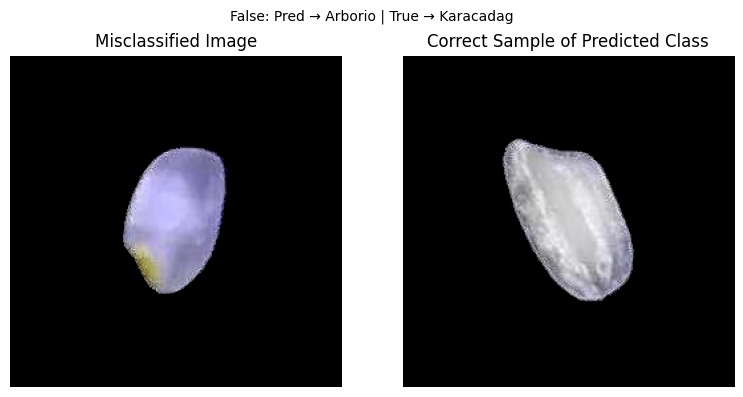

In [29]:
class_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

num_true = 0
num_false = 0
false_images = []
false_titles = []
comparison_images = []

def find_real_sample_of_class(dataset, class_index, exclude_image):
    """
    Find an image in the dataset belonging to class_index that is NOT equal to exclude_image.
    Returns a numpy array image or None if not found.
    """
    for i in range(len(dataset)):
        img, label = dataset[i]
        if label == class_index:
            # Compare images; make sure they are not the same
            if not torch.equal(img, exclude_image):
                # Convert tensor image to numpy for visualization
                return img.cpu().numpy().transpose(1, 2, 0)  # CHW -> HWC
    return None

# Make sure model is in eval mode
cnn.eval()

max_samples = 20
processed_samples = 0

with torch.no_grad():
    for images, labels in val_loader:
        batch_size = images.size(0)

        # Limit batch if it goes over max_samples
        if processed_samples + batch_size > max_samples:
            batch_size = max_samples - processed_samples
            images = images[:batch_size]
            labels = labels[:batch_size]

        images = images.to(next(cnn.parameters()).device)
        labels = labels.to(next(cnn.parameters()).device)

        outputs = cnn(images)
        _, predicted = torch.max(outputs, 1)

        for i in range(batch_size):
            predicted_class = predicted[i].item()
            true_class = labels[i].item()

            print(f"Predicted: {class_names[predicted_class]}, True: {class_names[true_class]}")

            if predicted_class == true_class:
                print("\033[32mTrue prediction\033[0m")
                num_true += 1
            else:
                print("\033[31mFalse prediction\033[0m")
                num_false += 1
                # Store misclassified image (convert CHW to HWC for imshow)
                false_images.append(images[i].cpu().numpy().transpose(1, 2, 0))
                false_titles.append(f"False: Pred → {class_names[predicted_class]} | True → {class_names[true_class]}")
                comparison_images.append(find_real_sample_of_class(val_loader.dataset, predicted_class, images[i].cpu()))

        processed_samples += batch_size
        if processed_samples >= max_samples:
            break

print(f"\n\033[34m{num_true} correct predictions, {num_false} incorrect predictions (out of {processed_samples} samples)\033[0m")

# Plot misclassified images alongside correct sample images
for i in range(len(false_images)):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    axs[0].imshow(false_images[i])
    axs[0].set_title("Misclassified Image")
    axs[0].axis("off")

    if comparison_images[i] is not None:
        axs[1].imshow(comparison_images[i])
        axs[1].set_title("Correct Sample of Predicted Class")
    else:
        axs[1].text(0.5, 0.5, "No sample found", ha='center', va='center')
    axs[1].axis("off")

    plt.suptitle(false_titles[i], fontsize=10)
    plt.tight_layout()
    plt.show()

In [30]:
validation_split = 0.2
image_size = (250,250)
batch_size = 16

transform = transforms.Compose(
    [transforms.Resize(image_size),
     transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)



full_dataset = datasets.ImageFolder(root = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset', transform = transform)
total_size = len(full_dataset)
val_size = int(validation_split * total_size)
train_size = int((1-validation_split)*total_size)
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader (train_dataset, batch_size = batch_size, shuffle = True)

val_loader = DataLoader (val_dataset, batch_size = batch_size, shuffle = True)

#classes = ('arborio', 'basmati', 'ipsala', 'jasmine', 'karacadag')

In [31]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool  = nn.MaxPool2d(2,2)
        self.fc1   = nn.Linear(32*124**2,8)
        self.fc2   = nn.Linear(8,5)
        self.flatten = nn.Flatten()
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.softmax(x, dim = 1)
        return x

cnn = CNN()

In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=1e-3, momentum=0.9)

In [33]:
if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs!")
    cnn = nn.DataParallel(cnn)

cnn.to(device)

Using 2 GPUs!


DataParallel(
  (module): CNN(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (fc1): Linear(in_features=492032, out_features=8, bias=True)
    (fc2): Linear(in_features=8, out_features=5, bias=True)
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
)

In [34]:
num_epochs = 20
best_val_accuracy = 0.0
best_model_path = '/kaggle/working/best_model2.pth'
history = {
    'train_loss': [],
    'train_accuracy': [],
    'val_loss': [],
    'val_accuracy': []
}

for epoch in range(num_epochs):  # loop over the dataset multiple times
    cnn.train()
    running_loss = 0.0
    correct = 0
    total = 0

    print(f"\nEpoch {epoch + 1}/{num_epochs}")
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc='Training', ncols=100)

    for i, data in progress_bar:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Accuracy tracking
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Update tqdm description every 10 batches
        if (i + 1) % 10 == 0 or (i + 1) == len(train_loader):
            progress_bar.set_postfix({
                'Loss': f"{running_loss / (i + 1):.4f}",
                'Acc': f"{(correct / total):.4f}"
            })

    # Compute average training loss and accuracy for the epoch
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total

    # Validation phase
    cnn.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = cnn(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = correct / total
    
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(cnn.state_dict(), best_model_path)
        print(f"💾 Best model saved at epoch {epoch + 1} with Val Acc: {val_accuracy:.4f}")

    # Save history
    history['train_loss'].append(train_loss)
    history['train_accuracy'].append(train_accuracy)
    history['val_loss'].append(val_loss)
    history['val_accuracy'].append(val_accuracy)

    print(f"✅ Epoch {epoch + 1} Summary: "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")
    if val_accuracy>= 0.94:
        stopping = input('Shall we stop, is this enough?? 1.Yes 2.No')
        if int(stopping) == 1:
            break

print('\n🎉 Finished Training')


Epoch 1/20


Training: 100%|████████████████████████| 3750/3750 [02:46<00:00, 22.58it/s, Loss=1.1915, Acc=0.7770]


💾 Best model saved at epoch 1 with Val Acc: 0.9053
✅ Epoch 1 Summary: Train Loss: 1.1915, Train Acc: 0.7770, Val Loss: 1.0555, Val Acc: 0.9053

Epoch 2/20


Training: 100%|████████████████████████| 3750/3750 [02:47<00:00, 22.34it/s, Loss=1.0302, Acc=0.9148]


💾 Best model saved at epoch 2 with Val Acc: 0.9307
✅ Epoch 2 Summary: Train Loss: 1.0302, Train Acc: 0.9148, Val Loss: 1.0005, Val Acc: 0.9307

Epoch 3/20


Training: 100%|████████████████████████| 3750/3750 [02:46<00:00, 22.52it/s, Loss=0.9937, Acc=0.9316]


💾 Best model saved at epoch 3 with Val Acc: 0.9401
✅ Epoch 3 Summary: Train Loss: 0.9937, Train Acc: 0.9316, Val Loss: 0.9810, Val Acc: 0.9401


Shall we stop, is this enough?? 1.Yes 2.No 2



Epoch 4/20


Training: 100%|████████████████████████| 3750/3750 [03:34<00:00, 17.45it/s, Loss=0.9803, Acc=0.9376]


✅ Epoch 4 Summary: Train Loss: 0.9803, Train Acc: 0.9376, Val Loss: 0.9769, Val Acc: 0.9390

Epoch 5/20


Training: 100%|████████████████████████| 3750/3750 [02:46<00:00, 22.53it/s, Loss=0.9742, Acc=0.9401]


✅ Epoch 5 Summary: Train Loss: 0.9742, Train Acc: 0.9401, Val Loss: 0.9731, Val Acc: 0.9401


Shall we stop, is this enough?? 1.Yes 2.No 1



🎉 Finished Training


[0.9052666666666667, 0.9306666666666666, 0.9401333333333334, 0.939, 0.9401333333333334]


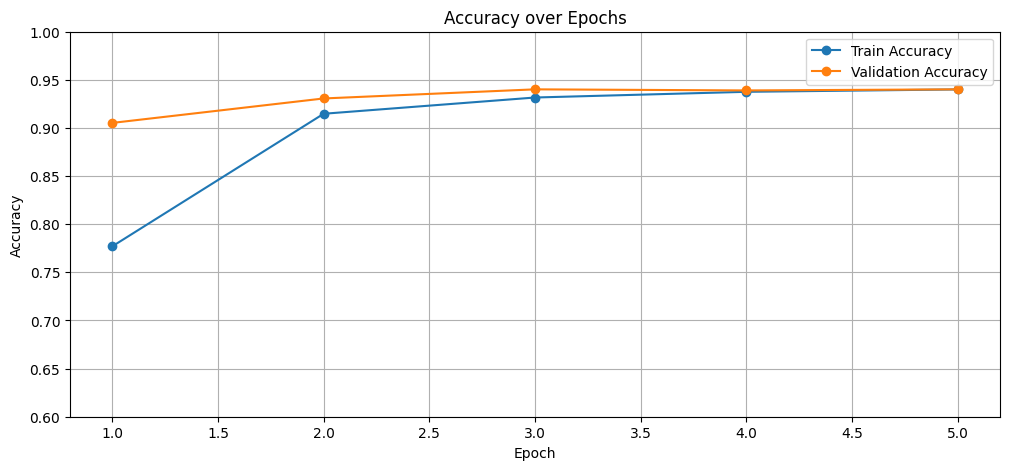

In [35]:
epochs = range(1, len(history['val_accuracy']) + 1)
print(history['val_accuracy'])
# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.plot(epochs, history['train_accuracy'], label='Train Accuracy', marker='o')
plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1)
plt.grid(True)
plt.legend()

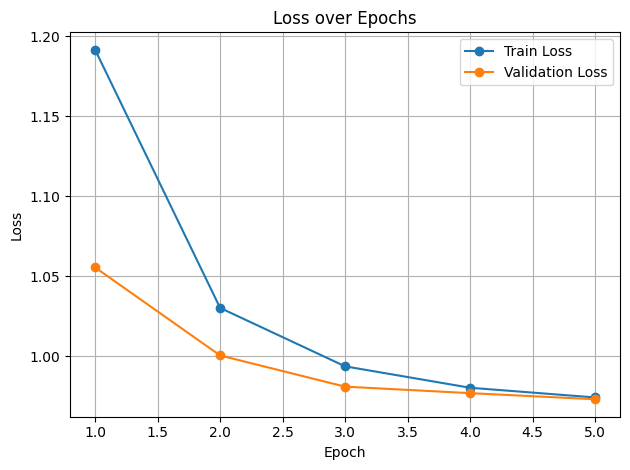

In [36]:
plt.plot(epochs, history['train_loss'], label='Train Loss', marker='o')
plt.plot(epochs, history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [37]:
cnn.load_state_dict(torch.load('/kaggle/working/best_model2.pth'))
cnn.to(device)
cnn.eval() 

DataParallel(
  (module): CNN(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (fc1): Linear(in_features=492032, out_features=8, bias=True)
    (fc2): Linear(in_features=8, out_features=5, bias=True)
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
)

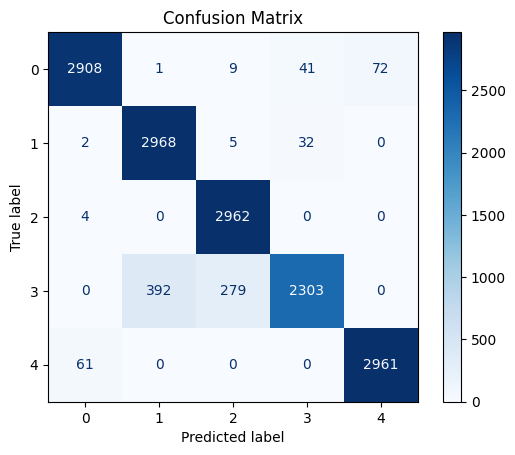

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load best model
cnn.load_state_dict(torch.load(best_model_path))
cnn.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for data in val_loader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = cnn(inputs)
        _, predicted = torch.max(outputs.data, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Predicted: Ipsala, True: Ipsala
True prediction
Predicted: Basmati, True: Basmati
True prediction
Predicted: Karacadag, True: Karacadag
True prediction
Predicted: Arborio, True: Arborio
True prediction
Predicted: Basmati, True: Jasmine
False prediction
Predicted: Karacadag, True: Karacadag
True prediction
Predicted: Arborio, True: Arborio
True prediction
Predicted: Karacadag, True: Karacadag
True prediction
Predicted: Karacadag, True: Karacadag
True prediction
Predicted: Ipsala, True: Ipsala
True prediction
Predicted: Arborio, True: Arborio
True prediction
Predicted: Arborio, True: Arborio
True prediction
Predicted: Ipsala, True: Ipsala
True prediction
Predicted: Arborio, True: Arborio
True prediction
Predicted: Basmati, True: Basmati
True prediction
Predicted: Ipsala, True: Ipsala
True prediction
Predicted: Jasmine, True: Jasmine
True prediction
Predicted: Karacadag, True: Karacadag
True prediction
Predicted: Karacadag, True: Karacadag
True prediction
Predicted: Karacadag, True: Karac

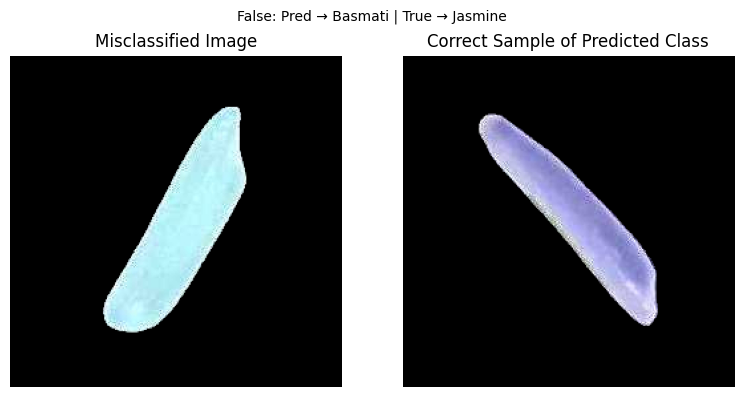

In [39]:
class_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

num_true = 0
num_false = 0
false_images = []
false_titles = []
comparison_images = []

def find_real_sample_of_class(dataset, class_index, exclude_image):
    """
    Find an image in the dataset belonging to class_index that is NOT equal to exclude_image.
    Returns a numpy array image or None if not found.
    """
    for i in range(len(dataset)):
        img, label = dataset[i]
        if label == class_index:
            # Compare images; make sure they are not the same
            if not torch.equal(img, exclude_image):
                # Convert tensor image to numpy for visualization
                return img.cpu().numpy().transpose(1, 2, 0)  # CHW -> HWC
    return None

# Make sure model is in eval mode
cnn.eval()

max_samples = 20
processed_samples = 0

with torch.no_grad():
    for images, labels in val_loader:
        batch_size = images.size(0)

        # Limit batch if it goes over max_samples
        if processed_samples + batch_size > max_samples:
            batch_size = max_samples - processed_samples
            images = images[:batch_size]
            labels = labels[:batch_size]

        images = images.to(next(cnn.parameters()).device)
        labels = labels.to(next(cnn.parameters()).device)

        outputs = cnn(images)
        _, predicted = torch.max(outputs, 1)

        for i in range(batch_size):
            predicted_class = predicted[i].item()
            true_class = labels[i].item()

            print(f"Predicted: {class_names[predicted_class]}, True: {class_names[true_class]}")

            if predicted_class == true_class:
                print("\033[32mTrue prediction\033[0m")
                num_true += 1
            else:
                print("\033[31mFalse prediction\033[0m")
                num_false += 1
                # Store misclassified image (convert CHW to HWC for imshow)
                false_images.append(images[i].cpu().numpy().transpose(1, 2, 0))
                false_titles.append(f"False: Pred → {class_names[predicted_class]} | True → {class_names[true_class]}")
                comparison_images.append(find_real_sample_of_class(val_loader.dataset, predicted_class, images[i].cpu()))

        processed_samples += batch_size
        if processed_samples >= max_samples:
            break

print(f"\n\033[34m{num_true} correct predictions, {num_false} incorrect predictions (out of {processed_samples} samples)\033[0m")

# Plot misclassified images alongside correct sample images
for i in range(len(false_images)):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    axs[0].imshow(false_images[i])
    axs[0].set_title("Misclassified Image")
    axs[0].axis("off")

    if comparison_images[i] is not None:
        axs[1].imshow(comparison_images[i])
        axs[1].set_title("Correct Sample of Predicted Class")
    else:
        axs[1].text(0.5, 0.5, "No sample found", ha='center', va='center')
    axs[1].axis("off")

    plt.suptitle(false_titles[i], fontsize=10)
    plt.tight_layout()
    plt.show()